In [10]:
import pandas as pd

# total crude steel production
df = pd.read_excel('total_steel_production.xlsx')
df = df.dropna()
df.columns = df.iloc[0]
df = df[1:]
df.reset_index(drop=True, inplace=True)
df

1,Country,2018,2019.0,2020.0,2021.0,2022.0
0,Albania,0,0.000,0.000,0.000000e+00,0.000000e+00
1,Algeria,2300,2400.000,3000.000,3.491324e+03,3.500000e+03
2,Angola,275,290.000,250.000,2.750000e+02,2.700000e+02
3,Argentina,5161.75,4644.519,3651.143,4.875083e+03,5.093869e+03
4,Armenia,0,0.000,0.000,0.000000e+00,0.000000e+00
...,...,...,...,...,...,...
120,Uzbekistan,646,666.000,939.198,1.050000e+03,9.500000e+02
121,Venezuela,129,50.808,29.153,2.942700e+01,2.712800e+01
122,Viet Nam,15471,17469.000,19900.000,2.301900e+04,2.000356e+04
123,World,1828055.45,1876657.733,1881601.045,1.961740e+06,1.885738e+06


In [11]:
# iron and steel manufacturing in the US
df = pd.read_csv('Iron & Steel Manufacturing in the US.csv')
df

,Category,Annual Revenue ($bn),Change
0,2010,129.0,43.9
1,2011,155.8,20.8
2,2012,149.5,-4.1
3,2013,140.5,-6.0
4,2014,139.8,-0.5
5,2015,112.2,-19.7
6,2016,99.9,-10.9
7,2017,107.9,7.9
8,2018,123.3,14.3
9,2019,108.2,-12.2


In [12]:
# iron and steel business concentration
df = pd.read_csv('Iron & Steel Business Concentration.csv')
df

,Category,US
0,Ohio,8.816
1,Indiana,6.297
2,Illinois,5.038
3,Michigan,4.534
4,Wisconsin,1.511
5,Pennsylvania,9.068
6,New York,3.526
7,New Jersey,1.763
8,Delaware,1.511
9,Maryland,1.008


In [13]:
# NYSE American Steel Index
df = pd.read_csv('HistoricalPrices.csv')
df

,Date,Open,High,Low,Close
0,11/03/23,1922.64,1953.43,1922.64,1934.66
1,11/02/23,1867.19,1926.82,1867.19,1922.64
2,11/01/23,1844.13,1868.80,1835.11,1867.19
3,10/31/23,1837.27,1851.79,1828.39,1844.13
4,10/30/23,1827.37,1852.25,1827.37,1837.27
...,...,...,...,...,...
58,08/14/23,1960.94,1964.43,1914.66,1960.94
59,08/11/23,1917.49,1929.70,1910.40,1917.49
60,08/10/23,1928.26,1965.08,1921.72,1928.26
61,08/09/23,1964.94,1973.53,1946.99,1949.94


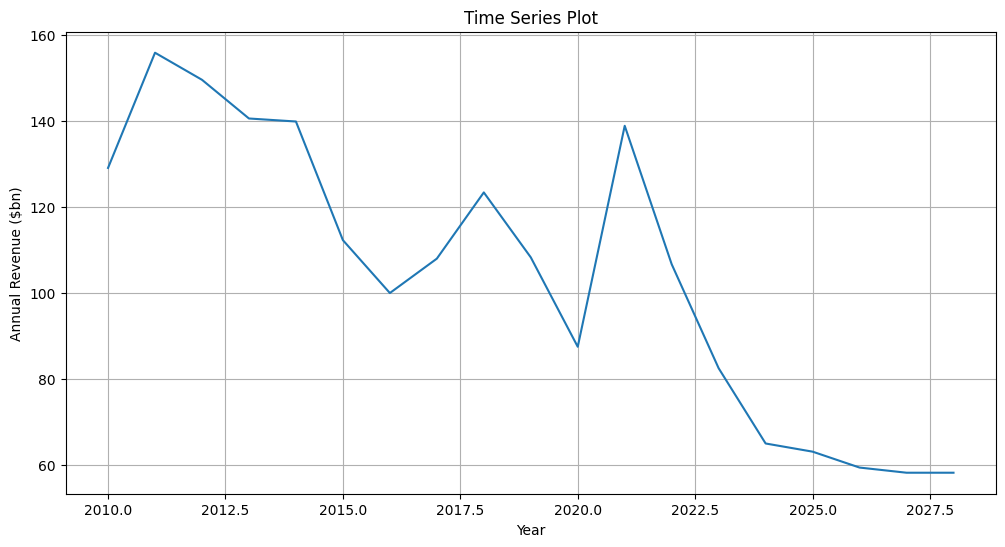

<Figure size 1200x600 with 0 Axes>

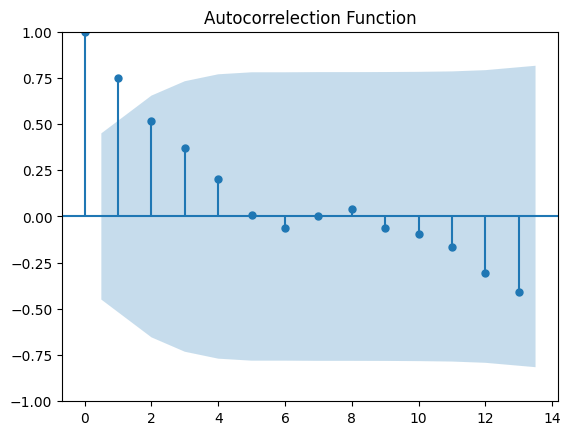

<Figure size 1200x600 with 0 Axes>

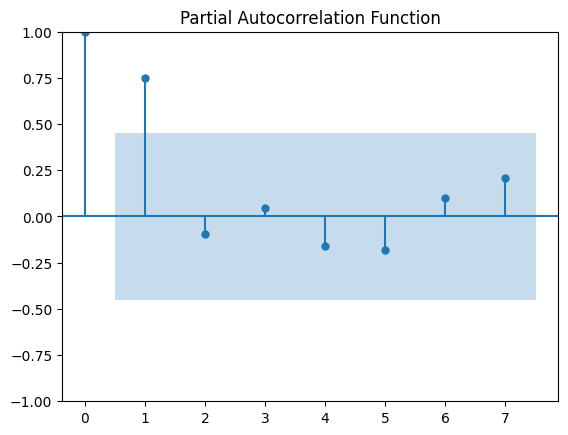

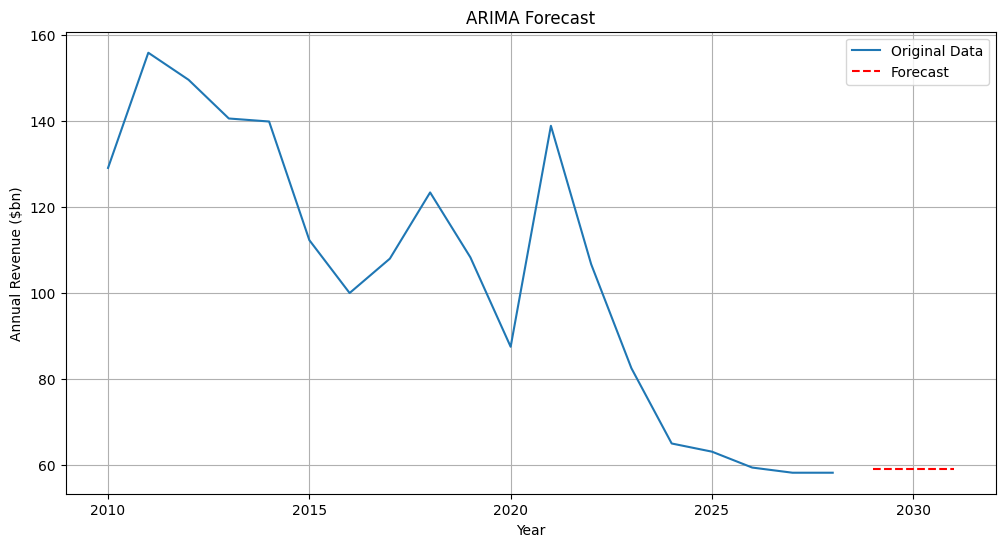

In [14]:
# ARIMA Model for Time Series Forecasting

import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Load the data from the CSV file
df = pd.read_csv('Iron & Steel Manufacturing in the US.csv')

# Visualize the data
plt.figure(figsize=(12, 6))
plt.plot(df["Category"], df["Annual Revenue ($bn)"])
plt.xlabel("Year")
plt.ylabel("Annual Revenue ($bn)")
plt.title("Time Series Plot")
plt.grid()
plt.show()

# Check for stationarity by plotting the autocorrelation and partial autocorrelation functions
plt.figure(figsize=(12, 6))
plot_acf(df["Annual Revenue ($bn)"])
plt.title("Autocorrelection Function")
plt.show()

plt.figure(figsize=(12, 6))
plot_pacf(df["Annual Revenue ($bn)"], lags=7)
plt.title("Partial Autocorrelation Function")
plt.show()

# Perform differencing to make the time series stationary
df["Diff"] = df["Annual Revenue ($bn)"].diff().fillna(0)

# Fit an ARIMA model
# Choose the order (p, d, q) parameters based on the ACF and PACF plots
p = 1  # AutoRegressive (AR) order
d = 1  # Differencing (I) order
q = 1  # Moving Average (MA) order

model = ARIMA(df["Annual Revenue ($bn)"], order=(p, d, q))
model_fit = model.fit()

# Generate forecasts and visualize them
# Forecast for future years
n_forecast = 3
forecast, stderr, conf_int = model_fit.forecast(steps=n_forecast)

# Append forecasted values to the DataFrame
future_years = range(df["Category"].max() + 1, df["Category"].max() + 1 + n_forecast)
df_forecast = pd.DataFrame({"Category": future_years, "Forecast": forecast})

# Plot original data and forecast
plt.figure(figsize=(12, 6))
plt.plot(df["Category"], df["Annual Revenue ($bn)"], label="Original Data")
plt.plot(df_forecast["Category"], df_forecast["Forecast"], label="Forecast", linestyle='dashed', color='red')
plt.xlabel("Year")
plt.ylabel("Annual Revenue ($bn)")
plt.title("ARIMA Forecast")
plt.legend()
plt.grid()
plt.show()